In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Binomial Distribution

In sostanza, una variabile o processo può essere definito binomiale se rispetta tutti i seguenti [criteri](https://www.khanacademy.org/math/ap-statistics/random-variables-ap/binomial-random-variable/v/recognizing-binomial-variables):
* il risultato di ogni evento può essere considerato di due sole tipologie: positivo o negativo, + o -, bianco o nero, successo o fallimento, ecc...
* ciascun evento è indipendente da tutti gli altri possibili
* il processo o variabile assume un determinato e fissato numero intero di valori
* la probabilità di successo/fallimento di ogni evento è costante

La distribuzione binomiale $\mathcal{B}(n,p)$ è caratterizzata da due parametri:
* $n$: il numero di prove effettuate.
* $p$: la probabilità di successo della singola $X_i$ (con $0 \le p \le 1$).
Per semplicità di notazione viene solitamente utilizzato anche il parametro $q=1-p$, che esprime la probabilità di fallimento per una singola prova.

La distribuzione di probabilità è:

$P(k) = P(X_1+X_2+\dotsb+X_n=k) = \binom n k p^k q^{n - k}$

cioè ogni successione con $k$ successi e $n-k$ insuccessi ha probabilità $p^kq^{n-k}$, mentre il numero di queste successioni, pari al numero di modi  in cui possono essere disposti i $k$ successi negli $n$ tentativi, è dato dal coefficiente binomiale $\textstyle\binom n k = \frac{n!}{k!(n-k)!}$.

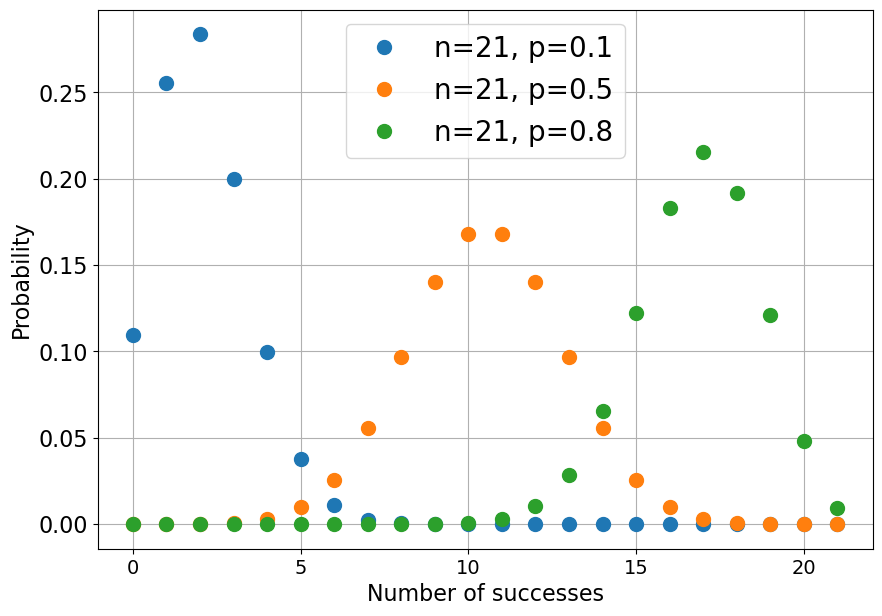

In [4]:
from scipy.stats import binom

# Define the parameters of the binomial distribution
n = 21 # number of trials
p = 0.5 # probability of success (will be chanced later)

x = np.arange(0, n+1) # possible number of successes

plt.figure(figsize=(10,7))

for p in [0.1,0.5,0.8]:
    plt.plot(x, binom.pmf(x, n, p), 'o', markersize=10 ,label='n={}, p={}'.format(n,p))

plt.xlabel('Number of successes', fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=16)
plt.legend(loc=0, fontsize=20)
plt.grid(axis = 'y')
plt.grid(axis = 'x')

# Show the plot
plt.show()

La formula del Teorema binomiale mostra come la somma di tutte le probabilità nella distribuzione sia uguale a $1$:

$\sum_{k=0}^{n} P(S_n=k) =  \sum_{k=0}^{n} \binom n k p^k q^{n - k} = (p+q)^n = (p + 1 - p)^n = (1)^n = 1$

In [3]:
# check that the sum is 1
np.sum(binom.pmf(x, n, 0.4))

1.0000000000000002

## Run experiments, toss toys

In [5]:
# Linear congruential generator: generating uniform numbers between 0 and 1 
def lcg(m=2**32, a=1103515245, c=12345):
    lcg.current = (a*lcg.current + c) % m
    return lcg.current/m

# setting the seed
lcg.current = 123456

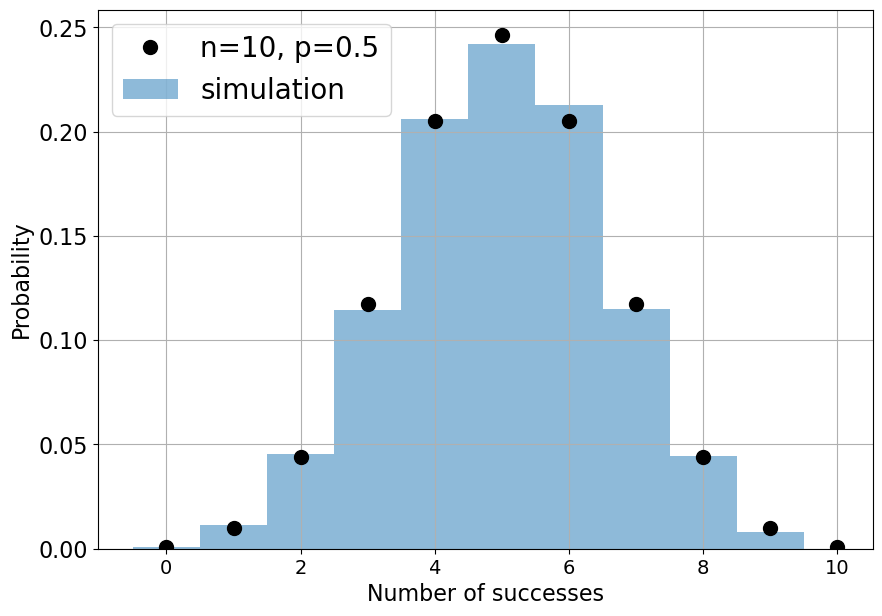

In [6]:
# The sum of Bernulli distributed variables
Sn=[]

# the binomial coefficients
p,n=0.5, 10

# generate N toys (Bernulli sequences)
N=1000
for run in range(10000):
    u=np.array([lcg() for i in range(n)])
    # counting the number of successes in the sequence of n tries
    Sn.append(len(u[u>p]))
    
    
# Alternatively, using the library
#Sn = binom.rvs(n, p, size=10000)

    
x = np.arange(0, n+1)    
    
plt.figure(figsize=(10,7))
plt.plot(x, binom.pmf(x, n, p), 'ko', markersize=10 , label='n={}, p={}'.format(n,p))
plt.hist(Sn, bins=x-0.5, density=True, alpha=0.5, label='simulation')
plt.xlabel('Number of successes', fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=16)
plt.legend(loc=0, fontsize=20)
plt.grid(axis = 'y')
plt.grid(axis = 'x')


In [7]:
print ('Expected: Mean={}, Variance={}'.format(n*p,n*p*(1-p)))
print ('Computed: Mean={:.3f}, Variance={:.3f}'.format(np.mean(Sn),np.var(Sn)))

mean = np.sum(Sn)/len(Sn)
variance = np.sum([(x - mean) ** 2 for x in Sn])/len(Sn)

print ('Computed by hand: Mean={:.3f}, Variance={:.3f}'.format(mean,variance))


Expected: Mean=5.0, Variance=2.5
Computed: Mean=4.990, Variance=2.496
Computed by hand: Mean=4.990, Variance=2.496
